In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Regularización

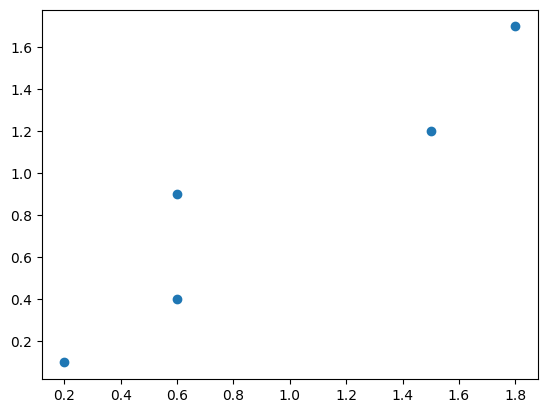

In [2]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x,y)
plt.show()

In [3]:
X_train, y_train = np.array([0.6, 1.8]), np.array([0.4, 1.7])
X_test, y_test = np.array([0.2, 0.6, 1.5]), np.array([0.1, 0.9, 1.2])
X_train.shape

(2,)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X_train.resize(len(X_train), 1)
y_train.resize(len(y_train), 1)
X_test.resize(len(X_test), 1)
y_test.resize(len(y_test), 1)
X_train.shape

(2, 1)

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')

y = -0.250 + 1.083x


In [7]:
modelo.coef_, modelo.intercept_

(array([[1.08333333]]), array([-0.25]))

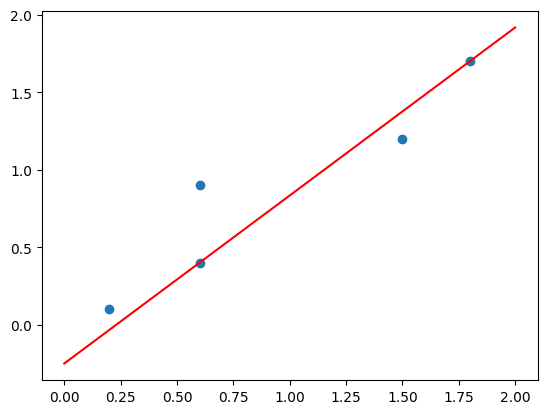

In [8]:
xx = np.linspace(0, 2, 2)
yy = modelo.predict(xx.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(xx, yy, c='r')

In [9]:
from sklearn.metrics import mean_squared_error as mse
print(f'Error: {mse(y_test, modelo.predict(X_test))}')

Error: 0.09946759259259248


In [10]:
print(f'Error: {mse(y_train, modelo.predict(X_train))}')

Error: 2.465190328815662e-32


#### Regularización de Ridge

In [11]:
from sklearn.linear_model import Ridge
modelo2 = Ridge(alpha=0.3)
modelo2.fit(X_train, y_train)
coefs = modelo2.coef_[0]
intercept = modelo2.intercept_[0]
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')
print(f'Error: {mse(y_test, modelo2.predict(X_test))}')

y = 0.132 + 0.765x
Error: 0.04533737024221454


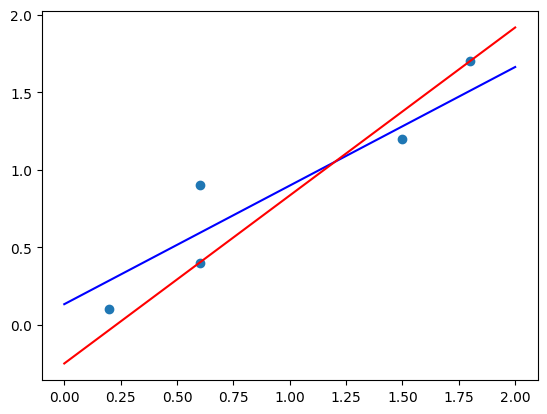

In [12]:
xx2 = np.linspace(0, 2, 2)
yy2 = modelo2.predict(xx.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(xx2, yy2, c='b')
plt.plot(xx, yy, c='r')
plt.show()

### Regresión polinomial

In [13]:
import pandas as pd

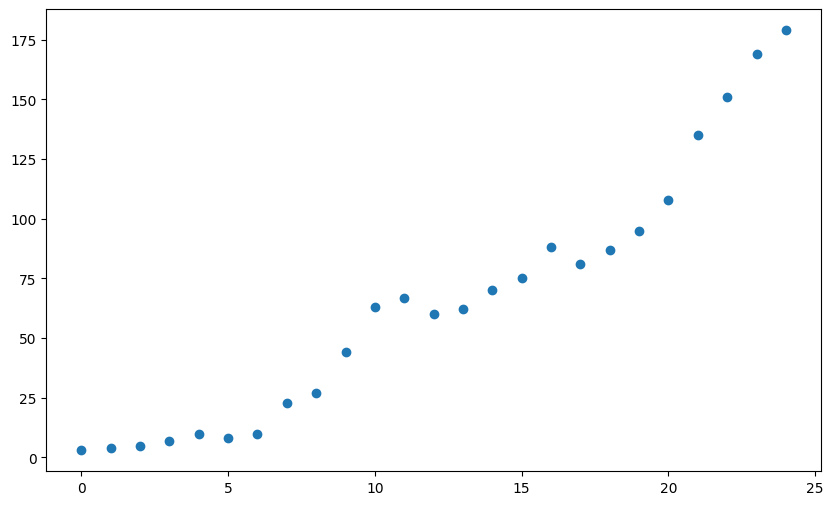

In [14]:
y = [3, 4, 5, 7, 10, 8, 10, 23, 27, 44, 63, 67, 60, 62, 70, 75, 88, 81,
     87, 95, 108, 135, 151, 169, 179]
x = np.arange(len(y))
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.show()

#### Características polinomiales

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generar las nuevas características
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.]])

### Modelo lineal

In [16]:
poly_linreg = LinearRegression()

In [17]:
# Ajuste y predicción
poly_linreg.fit(poly_features, y)
y_hat = poly_linreg.predict(poly_features)
poly_linreg.coef_, poly_linreg.intercept_

(array([1.73143813, 0.21727982]), np.float64(1.8758974358974498))

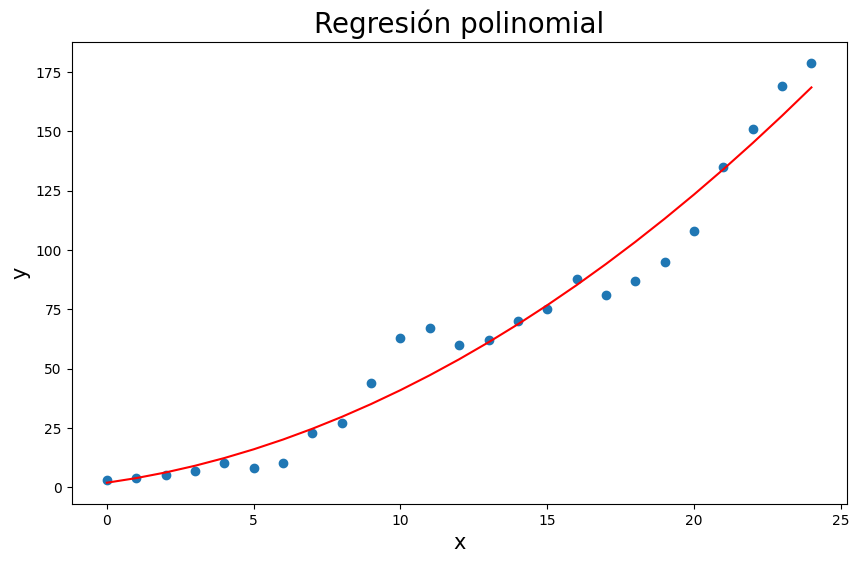

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')
plt.title('Regresión polinomial', size=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

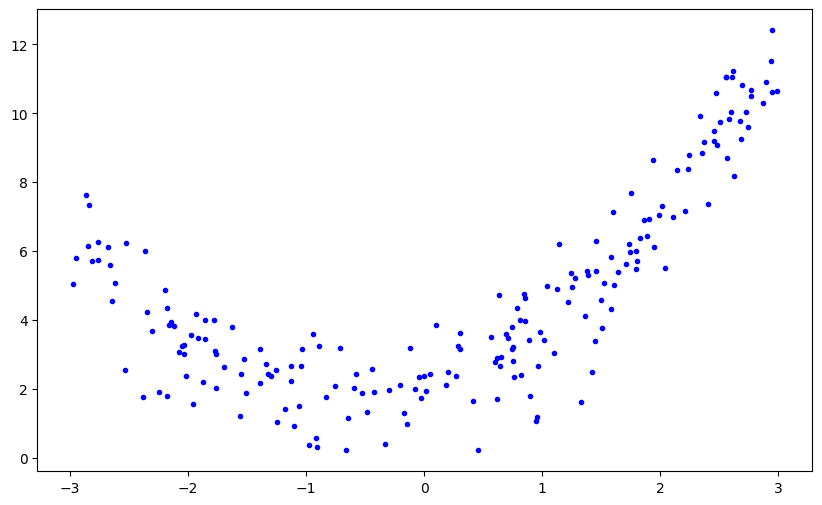

In [19]:
x = 6*np.random.rand(200, 1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200, 1)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [22]:
# Modelo lineal "puro"
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 : 0.5035490773968174
RMSE : 2.1349163571545806


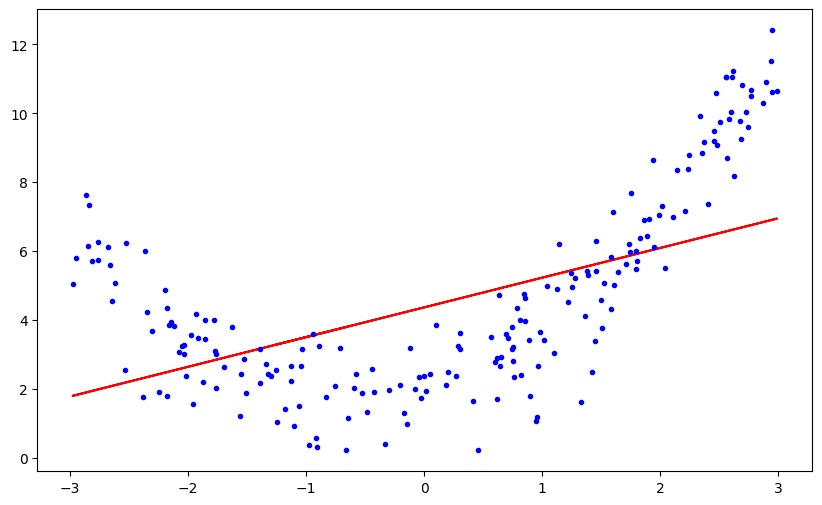

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, lr.predict(X_train), c='r')
plt.plot(x, y, 'b.')
plt.show()

In [24]:
# Polinomio de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo lineal para poly_reg
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 : 0.8688556370909016
RMSE : 1.0972801364939253


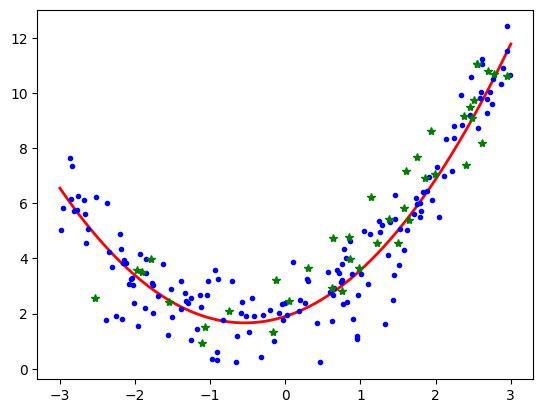

In [25]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)
plt.plot(x_new, y_new, 'r', linewidth=2, label='Curva de ajuste')
plt.plot(X_train, y_train, 'b.', label='Datos de entrenamiento')
plt.plot(X_test, y_test, 'g*', label='Datos de prueba')
plt.show()

In [31]:
# Polinomio de grado 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo lineal para poly_reg
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

# Si los resultados son similares, nos quedamos con el modelo más simple

R2 : 0.8670867152527858
RMSE : 1.1046556015635582
